# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”.
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que:
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [19]:
!pip install wbdata 
#Instalo la base de datos del banco nacion
import wbdata
import pandas as pd

In [62]:
wbdata.get_countries(query='B') #Busco los paises sindo Belgica:"BEL" y Rep. Dem. Congo: "COD"
wbdata.get_indicators(source=63)
#Busco los codigos de capital humano los indicadores HD.HCI.EYRS.FE para el promedio de años de acceso femenino a la educacion, HD.HCI.EYRS.MA para el promedio masculino y HD.HCI.EYRS para el promedio general



id                 name
-----------------  ----------------------------------------------------------
HD.HCI.AMRT        Survival Rate from Age 15-60
HD.HCI.AMRT.FE     Survival Rate from Age 15-60, Female
HD.HCI.AMRT.MA     Survival Rate from Age 15-60, Male
HD.HCI.EYRS        Expected Years of School
HD.HCI.EYRS.FE     Expected Years of School, Female
HD.HCI.EYRS.MA     Expected Years of School, Male
HD.HCI.HLOS        Harmonized Test Scores
HD.HCI.HLOS.FE     Harmonized Test Scores, Female
HD.HCI.HLOS.MA     Harmonized Test Scores, Male
HD.HCI.LAYS        Learning-Adjusted Years of School
HD.HCI.LAYS.FE     Learning-Adjusted Years of School, Female
HD.HCI.LAYS.MA     Learning-Adjusted Years of School, Male
HD.HCI.MORT        Probability of Survival to Age 5
HD.HCI.MORT.FE     Probability of Survival to Age 5, Female
HD.HCI.MORT.MA     Probability of Survival to Age 5, Male
HD.HCI.OVRL        Human Capital Index (HCI) (scale 0-1)
HD.HCI.OVRL.FE     Human Capital Index (HCI), Female (

In [53]:
wbdata.get_data("HD.HCI.EYRS.FE", country=["BEL", "COD"])  #Obtengo los datos de mi busqueda
wbdata.get_data("HD.HCI.EYRS.MA", country=["BEL", "COD"]) 
wbdata.get_data("HD.HCI.EYRS", country=["BEL", "COD"]) 

[{'indicator': {'id': 'HD.HCI.EYRS', 'value': 'Expected Years of School'},
  'country': {'id': 'CD', 'value': 'Congo, Dem. Rep.'},
  'countryiso3code': 'COD',
  'date': '2020',
  'value': 9.13184547424316,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'HD.HCI.EYRS', 'value': 'Expected Years of School'},
  'country': {'id': 'CD', 'value': 'Congo, Dem. Rep.'},
  'countryiso3code': 'COD',
  'date': '2019',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'HD.HCI.EYRS', 'value': 'Expected Years of School'},
  'country': {'id': 'CD', 'value': 'Congo, Dem. Rep.'},
  'countryiso3code': 'COD',
  'date': '2018',
  'value': 9.13184547424316,
  'unit': '',
  'obs_status': '',
  'decimal': 1},
 {'indicator': {'id': 'HD.HCI.EYRS', 'value': 'Expected Years of School'},
  'country': {'id': 'CD', 'value': 'Congo, Dem. Rep.'},
  'countryiso3code': 'COD',
  'date': '2017',
  'value': 9.19,
  'unit': '',
  'obs_status': '',
  'decimal': 

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [89]:
indicadores = {"HD.HCI.EYRS":"ESPECTATIVA_AÑOS_ESCOLARES_GEN", "HD.HCI.EYRS.MA":"ESPECTATIVA_AÑOS_ESCOLARES_MASC", "HD.HCI.EYRS.FE":"ESPECTATIVA_AÑOS_ESCOLARES_FEM"} 

data = wbdata.get_dataframe(indicadores, country=["BEL","COD"])  

df = pd.DataFrame(data=data) 

df.iloc[[0,2,3,11,13,14], :] 



ESPECTATIVA_AÑOS_ESCOLARES_GEN  \
country          date                                   
Belgium          2020                       13.524476   
                 2018                       13.524476   
                 2017                       13.410000   
Congo, Dem. Rep. 2020                        9.131845   
                 2018                        9.131845   
                 2017                        9.190000   

                       ESPECTATIVA_AÑOS_ESCOLARES_MASC  \
country          date                                    
Belgium          2020                        13.481013   
                 2018                        13.481013   
                 2017                        13.370000   
Congo, Dem. Rep. 2020                         9.484571   
                 2018                         9.484571   
                 2017                         9.510000   

                       ESPECTATIVA_AÑOS_ESCOLARES_FEM  
country          date                                  
Belgium          2020                       13.566797  
                 2018                       13.566797  
                 2017                       13.450000  
Congo, Dem. Rep. 2020                        8.786654  
                 2018                        8.786654  
                 2017                        8.860000

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [176]:
# Resolver acá estilo pyplot 


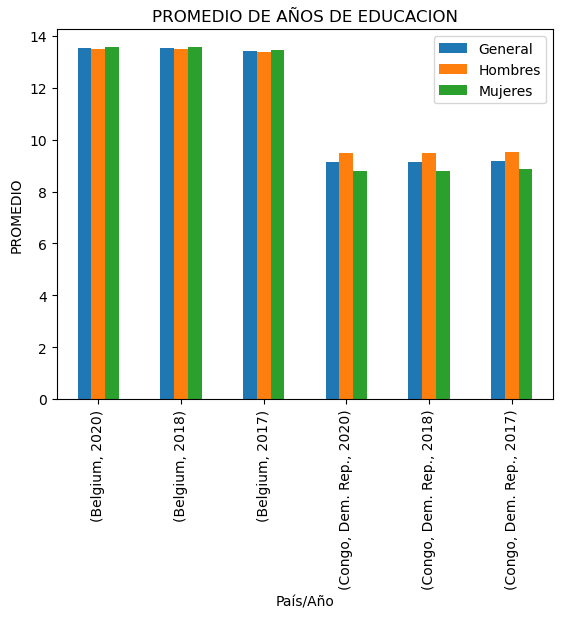

In [140]:
# Resolver acá estilo orientado-objetos
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo
ax = df.iloc[[0,2,3,11,13,14], :].plot(kind='bar', title='PROMEDIO DE AÑOS DE EDUCACION')
ax.set_xlabel('País/Año',color='black')
ax.set_ylabel('PROMEDIO',color='black')
ax.legend(["General","Hombres", "Mujeres"])


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
